TP NOTÉ – Visualisation de Données

Dataset : tips (Seaborn)
Python – Data Science

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

tips = sns.load_dataset("tips")
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Analyse de distribution (variable quantitative)
Variable étudiée : total_bill
Choix du graphique

Violin plot

Représente la densité complète

Plus informatif qu’un histogramme

Conforme à l’interdiction de l’histogramme par défaut

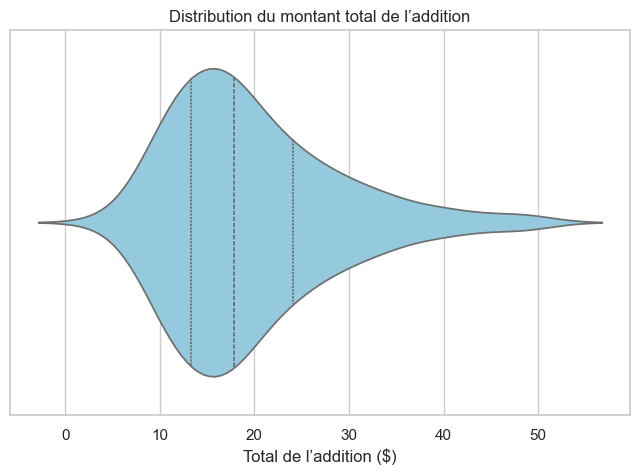

In [2]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=tips["total_bill"], inner="quartile", color="skyblue")
plt.title("Distribution du montant total de l’addition")
plt.xlabel("Total de l’addition ($)")
plt.show()


Interprétation

Distribution asymétrique à droite

Présence de valeurs élevées rares

La majorité des additions se situent entre 10 et 25 dollars

Analyse de relation avec transformation
Variables

total_bill (quantitative)

tip (quantitative)

Transformation obligatoire
Ratio tip / total_bill (taux de pourboire)

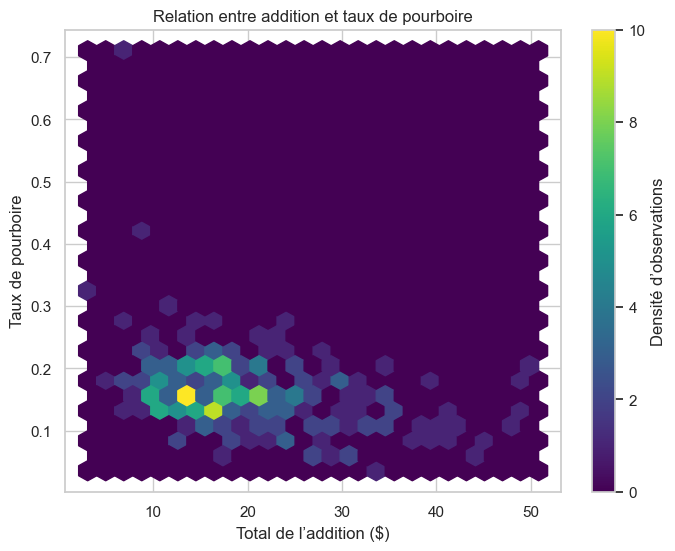

In [5]:
tips["tip_ratio"] = tips["tip"] / tips["total_bill"]
plt.figure(figsize=(8, 6))
plt.hexbin(
    tips["total_bill"],
    tips["tip_ratio"],
    gridsize=25,
    cmap="viridis"
)
plt.colorbar(label="Densité d’observations")
plt.xlabel("Total de l’addition ($)")
plt.ylabel("Taux de pourboire")
plt.title("Relation entre addition et taux de pourboire")
plt.show()


Choix du graphique

Hexbin plot

Agrégation visuelle

Évite le scatter plot simple interdit

Lisible en cas de densité élevée

Interprétation

Forte concentration pour les petites additions

Le taux de pourboire diminue légèrement quand l’addition augmente

Effet plafond sur les pourboires élevés

Analyse catégorielle avancée
Variables catégorielles

day

time

**Choix du graphique**

Heatmap de moyennes

Accessible à un public non technique

Comparaison immédiate entre catégories

In [6]:
#PREPARATION DES DONNEES
pivot_table = tips.pivot_table(
    values="total_bill",
    index="day",
    columns="time",
    aggfunc="mean"
)


C:\Users\tsats\AppData\Local\Temp\ipykernel_34236\4073929795.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = tips.pivot_table(


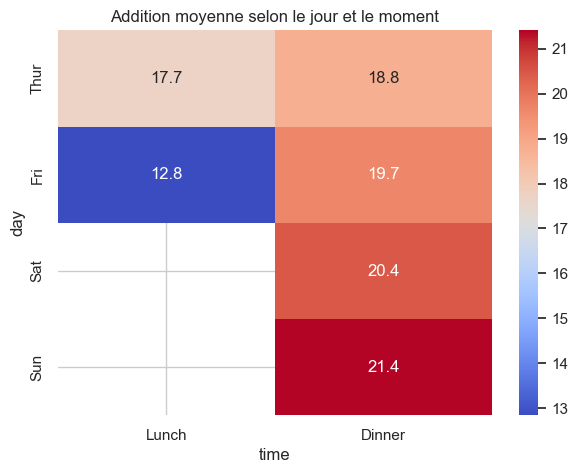

In [7]:
plt.figure(figsize=(7, 5))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap="coolwarm"
)
plt.title("Addition moyenne selon le jour et le moment")
plt.show()


Interprétation

Les additions sont plus élevées le soir

Le week-end génère des montants plus importants

Comportement client dépendant du contexte temporel

Visualisation Matplotlib avancée (OBLIGATOIRE)

- Seaborn interdit
- API objet obligatoire
- Ligne de référence obligatoire

Variable ordinale : size (taille de la table)

In [8]:
mean_bill_by_size = tips.groupby("size")["total_bill"].mean()
overall_mean = tips["total_bill"].mean()


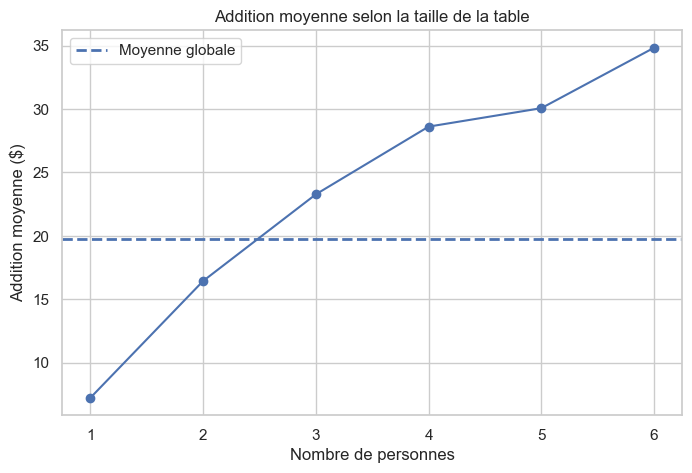

In [9]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(
    mean_bill_by_size.index,
    mean_bill_by_size.values,
    marker="o",
    linestyle="-",
)

ax.axhline(
    overall_mean,
    linestyle="--",
    linewidth=2,
    label="Moyenne globale"
)

ax.set_title("Addition moyenne selon la taille de la table")
ax.set_xlabel("Nombre de personnes")
ax.set_ylabel("Addition moyenne ($)")
ax.legend()

plt.show()


Justification des couleurs

Palette sobre → lisibilité

Ligne de référence en pointillés → distinction claire

Pas de surcharge visuelle

In [10]:
mean_tip_by_day = tips.groupby("day")["tip"].mean()
mean_tip_by_day


C:\Users\tsats\AppData\Local\Temp\ipykernel_34236\3110926837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_tip_by_day = tips.groupby("day")["tip"].mean()


day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

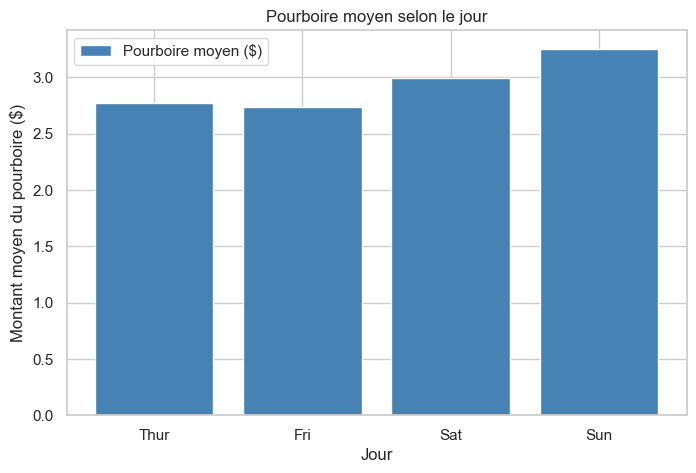

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(
    mean_tip_by_day.index,
    mean_tip_by_day.values,
    color="steelblue",
    label="Pourboire moyen ($)"
)

ax.set_title("Pourboire moyen selon le jour")
ax.set_xlabel("Jour")
ax.set_ylabel("Montant moyen du pourboire ($)")

ax.legend()  # 👈 LÉGENDE

plt.show()


Analyse critique
1️⃣ Biais ou limite principale

Dataset issu d’un seul restaurant

Pas représentatif d’autres cultures ou pays

2️⃣ Visualisation potentiellement trompeuse

La heatmap peut masquer la dispersion réelle

Les moyennes cachent les valeurs extrêmes

3️⃣ Information non observable

Revenus des clients

Qualité du service

Politique interne de pourboire